In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Q1. In order to predict house price based on several characteristics, such as location, square footage,
number of bedrooms, etc., you are developing an SVM regression model. Which regression metric in this
situation would be the best to employ?

In [3]:
df=pd.read_csv("/content/drive/MyDrive/data/Banglore_House_Price/Bengaluru_House_Data.csv")

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.shape

(13320, 9)

In [6]:
df.isnull().sum()/len(df)*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [8]:
# since society has large null values we can remove soceity columns

In [9]:
df=df.drop('society',axis=1)

In [10]:
df.dtypes

area_type        object
availability     object
location         object
size             object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [11]:
## seems some problem in total_sqft as numerical values but type object

In [12]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [13]:
## as we can see some range is there , lets check 

In [14]:
df1=df.copy()

In [15]:
def float_con(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
df1[df1['total_sqft'].map(float_con)==False]

,area_type,availability,location,size,total_sqft,bath,balcony,price
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,3010 - 3410,NaN,NaN,192.000
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,2957 - 3450,NaN,NaN,224.500
122,Super built-up Area,18-Mar,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005
...,...,...,...,...,...,...,...,...
12990,Super built-up Area,18-May,Talaghattapura,3 BHK,1804 - 2273,3.0,0.0,122.000
13059,Super built-up Area,Ready To Move,Harlur,2 BHK,1200 - 1470,2.0,0.0,72.760
13240,Super built-up Area,Ready To Move,Devanahalli,1 BHK,1020 - 1130,NaN,NaN,52.570
13265,Super built-up Area,20-Sep,Hoodi,2 BHK,1133 - 1384,2.0,0.0,59.135


In [17]:
## create function to convert range to single value 

In [18]:
def avg_con(x):
    y=x.split('-')
    if len(y)==2:
        r=(float(y[0])+float(y[1]))/2
        return r
    try:
        return float(x)
    except:
        None
        

In [19]:
df1['total_sqft']=df1['total_sqft'].apply(avg_con)

In [20]:
df1.isnull().sum()

area_type         0
availability      0
location          1
size             16
total_sqft       46
bath             73
balcony         609
price             0
dtype: int64

In [21]:
df1.dtypes

area_type        object
availability     object
location         object
size             object
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object

In [22]:
df1.nunique()

area_type          4
availability      81
location        1305
size              31
total_sqft      1999
bath              19
balcony            4
price           1994
dtype: int64

In [23]:
df1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [24]:
## apply label encoder to area type

In [25]:
df1['area_type']=df1['area_type'].map({'Super built-up  Area':0,'Built-up  Area':1,'Plot  Area':2,'Carpet  Area':3})

In [26]:
df1.dtypes

area_type         int64
availability     object
location         object
size             object
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object

In [27]:
## Lets convert Size to numerical values

In [28]:
df1['size']=df1['size'].str.split(' ').str[0]

In [29]:
df1['size']=df1['size'].astype(float)

In [30]:
df1.dtypes

area_type         int64
availability     object
location         object
size            float64
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object

In [31]:
df1['location']=df1['location'].str.strip()

In [32]:
df1.dtypes

area_type         int64
availability     object
location         object
size            float64
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object

In [33]:
df1.nunique()

area_type          4
availability      81
location        1294
size              19
total_sqft      1999
bath              19
balcony            4
price           1994
dtype: int64

In [34]:
df1['location']=df1['location'].str.lower()

In [35]:
df1.nunique()

area_type          4
availability      81
location        1283
size              19
total_sqft      1999
bath              19
balcony            4
price           1994
dtype: int64

In [36]:
def month_con(x):
    y=x.split('-')
    if len(y)==2:
        return str(y[1])
    else:
        return str(y[0])

In [37]:
df1['availability']=df1['availability'].apply(month_con)

In [38]:
df1['availability'].value_counts()

Ready To Move           10581
Dec                       728
May                       338
Apr                       298
Aug                       249
Mar                       246
Jul                       206
Jun                       200
Jan                       126
Oct                        91
Sep                        87
Nov                        79
Feb                        75
Immediate Possession       16
Name: availability, dtype: int64

In [39]:
df1.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,0,Dec,electronic city phase ii,2.0,1056.0,2.0,1.0,39.07
1,2,Ready To Move,chikka tirupathi,4.0,2600.0,5.0,3.0,120.00
2,1,Ready To Move,uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,0,Ready To Move,lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
4,0,Ready To Move,kothanur,2.0,1200.0,2.0,1.0,51.00


In [40]:
df1['availability']=df1['availability'].map({'Ready To Move':0,'Immediate Possession':0,'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12})

In [41]:
df1.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,0,12,electronic city phase ii,2.0,1056.0,2.0,1.0,39.07
1,2,0,chikka tirupathi,4.0,2600.0,5.0,3.0,120.00
2,1,0,uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,0,0,lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
4,0,0,kothanur,2.0,1200.0,2.0,1.0,51.00


In [42]:
df1['location'].value_counts().to_frame()

,location
whitefield,541
sarjapur road,399
electronic city,304
kanakpura road,273
thanisandra,237
...,...
escorts colony,1
rahat bagh,1
maruthi hbcs layout,1
nagarbhavi bda complex,1


In [43]:
df1[df1.duplicated()==True]

,area_type,availability,location,size,total_sqft,bath,balcony,price
905,0,12,kanakpura road,1.0,525.0,1.0,1.0,26.0
971,0,0,haralur road,3.0,1464.0,3.0,2.0,56.0
1115,0,0,haralur road,2.0,1027.0,2.0,2.0,44.0
1143,0,0,vittasandra,2.0,1246.0,2.0,1.0,64.5
1290,0,0,haralur road,2.0,1194.0,2.0,2.0,47.0
...,...,...,...,...,...,...,...,...
13285,0,0,vhbcs layout,2.0,1353.0,2.0,2.0,110.0
13299,0,12,whitefield,4.0,2856.0,5.0,0.0,154.5
13311,2,0,ramamurthy nagar,7.0,1500.0,9.0,2.0,250.0
13313,0,0,uttarahalli,3.0,1345.0,2.0,1.0,57.0


In [44]:
df1=df1.drop_duplicates(keep='first')

In [45]:
df1.shape

(12737, 8)

In [46]:
locations_count=df1['location'].value_counts()

In [47]:
list_less_than_10=locations_count[locations_count<10]

In [48]:
list_less_than_10

4th block koramangala                 9
ittamadu                              9
lingarajapuram                        9
2nd phase jp nagar                    9
vignana nagar                         9
                                     ..
kengeri satellite town ( bda site)    1
nagarbhavi  bda complex               1
rajanna layout                        1
brigade road                          1
abshot layout                         1
Name: location, Length: 1034, dtype: int64

In [49]:
list_less_than_10.index

Index(['4th block koramangala', 'ittamadu', 'lingarajapuram',
       '2nd phase jp nagar', 'vignana nagar', 'mathikere', 'gollahalli',
       'kamakshipalya', 'kaverappa layout', 'ejipura',
       ...
       'nti layout', '1a block koramangala', 'asha township, off hennur road',
       'escorts colony', 'rahat bagh', 'kengeri satellite town ( bda site)',
       'nagarbhavi  bda complex', 'rajanna layout', 'brigade road',
       'abshot layout'],
      dtype='object', length=1034)

In [50]:
df_new=df1.copy()

In [51]:
df_new['location']=df_new['location'].apply(lambda x:'other' if x in list_less_than_10.index else x)

In [52]:
df_new['location'].nunique()

250

In [53]:
df_new.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,0,12,electronic city phase ii,2.0,1056.0,2.0,1.0,39.07
1,2,0,chikka tirupathi,4.0,2600.0,5.0,3.0,120.00
2,1,0,uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,0,0,lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
4,0,0,kothanur,2.0,1200.0,2.0,1.0,51.00


In [54]:
df_new.dropna(inplace=True)

In [55]:
df_new.reset_index(drop=True,inplace=True)

In [56]:
df_new.shape

(12090, 8)

In [57]:
df_new['price_per_sqft']=round((df_new['price']/df_new['total_sqft']*100000),2)

In [58]:
df_new.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,0,12,electronic city phase ii,2.0,1056.0,2.0,1.0,39.07,3699.81
1,2,0,chikka tirupathi,4.0,2600.0,5.0,3.0,120.00,4615.38
2,1,0,uttarahalli,3.0,1440.0,2.0,3.0,62.00,4305.56
3,0,0,lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,6245.89
4,0,0,kothanur,2.0,1200.0,2.0,1.0,51.00,4250.00


In [59]:
df_new['price_per_sqft'].mean()

6960.76617369727

In [60]:
upper_limit=df_new['price_per_sqft'].mean()+df_new['price_per_sqft'].std()
lower_limit=df_new['price_per_sqft'].mean()-df_new['price_per_sqft'].std()

In [61]:
upper_limit

30120.035716403865

In [62]:
lower_limit

-16198.503369009326

In [63]:
df_new.shape

(12090, 9)

In [64]:
df_new=df_new[(df_new['price_per_sqft']<upper_limit) & (df_new['price_per_sqft']>lower_limit)]

In [65]:
df_new[df_new['price_per_sqft']<100]

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_per_sqft


In [66]:
df_new.reset_index(drop=True,inplace=True)

In [67]:
df_new['size'].value_counts()

2.0     5155
3.0     4418
4.0     1206
1.0      615
5.0      284
6.0      187
7.0       82
8.0       67
9.0       32
11.0       3
10.0       3
27.0       1
43.0       1
14.0       1
12.0       1
13.0       1
Name: size, dtype: int64

In [68]:
df_new=df_new[~(df_new['size']>20)]

In [69]:
df_new.reset_index(drop=True,inplace=True)

<ipython-input-70-cb9071a32a54>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_new.corr(),annot=True,cmap='Blues')


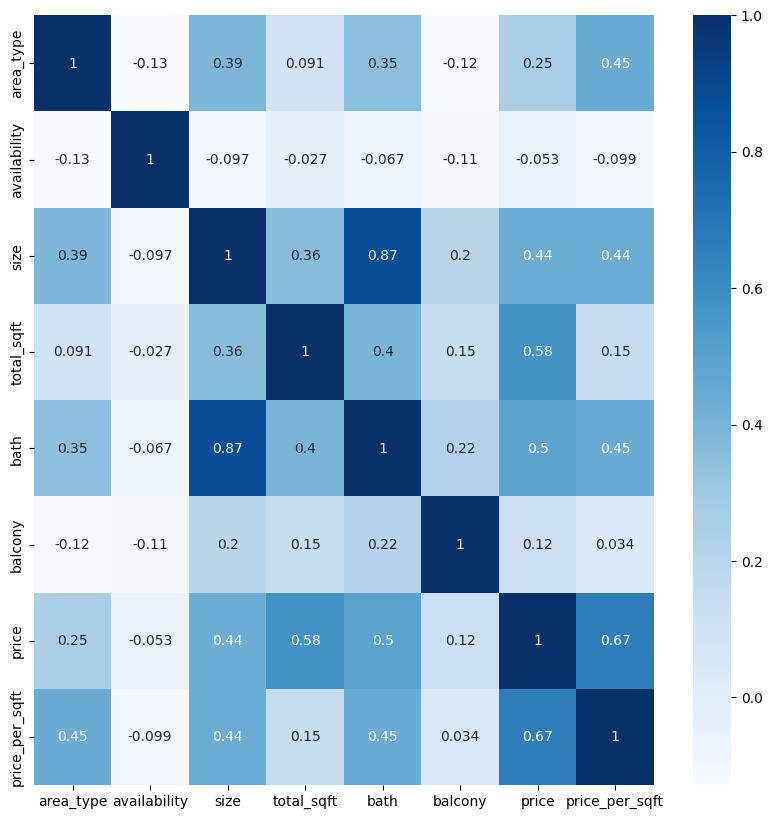

In [70]:
plt.figure(figsize=(10,10))
sns.heatmap(df_new.corr(),annot=True,cmap='Blues')
plt.show()

In [71]:
df_new.shape

(12055, 9)

In [72]:
df_cat=df_new.select_dtypes(include='O')

In [73]:
df_cat_ohe=pd.get_dummies(df_cat)

In [74]:
df_cat_ohe.head()

,location_1st block jayanagar,location_1st block koramangala,location_1st phase jp nagar,location_2nd stage nagarbhavi,location_5th block hbr layout,location_5th phase jp nagar,location_6th phase jp nagar,location_7th phase jp nagar,location_8th phase jp nagar,location_9th phase jp nagar,...,location_vijayanagar,location_vishveshwarya layout,location_vishwapriya layout,location_vittasandra,location_whitefield,location_yelachenahalli,location_yelahanka,location_yelahanka new town,location_yelenahalli,location_yeshwanthpur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
df_num=df_new.select_dtypes(exclude='O')

In [76]:
df_final=pd.concat([df_cat_ohe,df_num],axis=1)

In [77]:
df_final.head()

,location_1st block jayanagar,location_1st block koramangala,location_1st phase jp nagar,location_2nd stage nagarbhavi,location_5th block hbr layout,location_5th phase jp nagar,location_6th phase jp nagar,location_7th phase jp nagar,location_8th phase jp nagar,location_9th phase jp nagar,...,location_yelenahalli,location_yeshwanthpur,area_type,availability,size,total_sqft,bath,balcony,price,price_per_sqft
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,12,2.0,1056.0,2.0,1.0,39.07,3699.81
1,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,4.0,2600.0,5.0,3.0,120.00,4615.38
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,3.0,1440.0,2.0,3.0,62.00,4305.56
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3.0,1521.0,3.0,1.0,95.00,6245.89
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2.0,1200.0,2.0,1.0,51.00,4250.00


In [78]:
X=df_final.drop('price',axis=1)
y=df_final['price']

## Model Building

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
from sklearn.preprocessing import MinMaxScaler

In [81]:
scaler=MinMaxScaler()

In [82]:
from sklearn.svm import SVR

In [83]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [84]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=41)

In [85]:
x_train.shape

(9644, 257)

In [86]:
scaled_x_train=scaler.fit_transform(x_train)

In [87]:
scaled_x_test=scaler.transform(x_test)

In [88]:
svr=SVR(kernel='linear')

In [89]:
svr.fit(scaled_x_train,y_train)

SVR(kernel='linear')

In [90]:
y_pred=svr.predict(scaled_x_test)

In [91]:
r2_score(y_test,y_pred)*100

46.886805296034616

In [92]:
mean_absolute_error(y_test,y_pred)

32.43469741861374

In [93]:
mean_squared_error(y_test,y_pred)

6564.324558878643

In [94]:
np.sqrt(mean_squared_error(y_test,y_pred))

81.02051936934645

## Randomised_SearchCV

In [95]:
from sklearn.model_selection import RandomizedSearchCV

In [96]:
parameter = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

In [97]:
random_svm=RandomizedSearchCV(estimator=SVR(),param_distributions=parameter)

In [98]:
random_svm.fit(scaled_x_train,y_train)

RandomizedSearchCV(estimator=SVR(),
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'epsilon': [0.1, 0.2, 0.3],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['linear']})

In [99]:
random_svm.best_params_

{'kernel': 'linear', 'gamma': 0.01, 'epsilon': 0.3, 'C': 100}

In [100]:
random_svm.best_score_

0.641279752089212

In [114]:
svr_model=SVR(kernel= 'linear', gamma= 0.01, epsilon=0.3, C= 100)

In [115]:
svr_model.fit(scaled_x_train,y_train)
y_pred=svr_model.predict(scaled_x_test)
print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred))
print("Mean Sqaured Error : ",mean_squared_error(y_test,y_pred))
print("Root Mean Sqaured Error : ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score :",r2_score(y_test,y_pred)*100)

Mean Absolute Error : 16.245180462332584
Mean Sqaured Error :  2391.570361075253
Root Mean Sqaured Error :  48.90368453475927
R2 Score : 80.64935072958646


## SVR with other parameter

In [101]:
svr_model=SVR(kernel='rbf')

In [102]:
svr_model.fit(scaled_x_train,y_train)
y_pred=svr_model.predict(scaled_x_test)
print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred))
print("Mean Sqaured Error : ",mean_squared_error(y_test,y_pred))
print("Root Mean Sqaured Error : ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score :",r2_score(y_test,y_pred)*100)

Mean Absolute Error : 39.86212218961318
Mean Sqaured Error :  8954.735618013612
Root Mean Sqaured Error :  94.62946485114249
R2 Score : 27.545536157441607


In [103]:
## SVR with polynomial kernel

In [104]:
svr_model=SVR(kernel='poly',degree=2)

In [105]:
svr_model.fit(scaled_x_train,y_train)
y_pred=svr_model.predict(scaled_x_test)
print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred))
print("Mean Sqaured Error : ",mean_squared_error(y_test,y_pred))
print("Root Mean Sqaured Error : ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score :",r2_score(y_test,y_pred)*100)

Mean Absolute Error : 38.46883040352866
Mean Sqaured Error :  7699.422991976263
Root Mean Sqaured Error :  87.74635600397468
R2 Score : 37.702508641516566


## LInear Regression

In [106]:
from sklearn.linear_model import LinearRegression

In [107]:
LR=LinearRegression()

In [108]:
LR.fit(scaled_x_train,y_train)

LinearRegression()

In [109]:
y_pred=LR.predict(scaled_x_test)

In [110]:
r2_score(y_test,y_pred)*100

80.6410981485682

In [111]:
mean_absolute_error(y_test,y_pred)

23.56911603069266

In [112]:
mean_squared_error(y_test,y_pred)

2392.590307635693

In [113]:
np.sqrt(mean_squared_error(y_test,y_pred))

48.91411153885648

## Q1. In order to predict house price based on several characteristics, such as location, square footage,number of bedrooms, etc., you are developing an SVM regression model. Which regression metric in this situation would be the best to employ?

In the case of SVM regression model for predicting house prices based on multiple features, the most suitable regression metric to use would be the mean squared error (MSE).

MSE measures the average squared difference between the predicted and actual values. In this context, it will give you an idea of how well your SVM model is performing in predicting the house prices based on the input features. The lower the MSE, the better the performance of the model.

## Q2. You have built an SVM regression model and are trying to decide between using MSE or R-squared as your evaluation metric. Which metric would be more appropriate if your goal is to predict the actual price of a house as accurately as possible?


If your goal is to predict the actual price of a house as accurately as possible, then the evaluation metric that would be more appropriate is the mean squared error (MSE).

MSE measures the average squared difference between the predicted and actual values. In the context of predicting house prices, it will give you an idea of how far off the predicted prices are from the actual prices. The lower the MSE, the better the performance of the model in predicting the actual prices.

On the other hand, R-squared (R²) measures the proportion of variance in the target variable that is explained by the model. While R-squared is a useful metric for evaluating the overall goodness-of-fit of the model, it does not necessarily tell you how well the model is performing in predicting the actual prices.

## Q3. You have a dataset with a significant number of outliers and are trying to select an appropriate regression metric to use with your SVM model. Which metric would be the most appropriate in this scenario?

When dealing with a dataset that contains a significant number of outliers, the most appropriate regression metric to use with an SVM model is the mean absolute error (MAE).

The reason for this is that MAE is more robust to outliers than other regression metrics such as mean squared error (MSE) or root mean squared error (RMSE). MSE and RMSE are sensitive to outliers since they involve squaring the errors, which amplifies the impact of large errors. In contrast, MAE calculates the absolute difference between the predicted and actual values, which makes it less sensitive to outliers.

## Q4. You have built an SVM regression model using a polynomial kernel and are trying to select the bestmetric to evaluate its performance. You have calculated both MSE and RMSE and found that both values are very close. Which metric should you choose to use in this case?

If you have built an SVM regression model using a polynomial kernel and both the mean squared error (MSE) and root mean squared error (RMSE) are very close, either metric can be used to evaluate the performance of the model.

MSE and RMSE are both widely used metrics in regression problems, and they provide similar information about the performance of the model. The main difference between the two is that RMSE is more sensitive to large errors than MSE, as it involves taking the square root of the average squared error. However, since both MSE and RMSE are very close in this case, it suggests that there are no large errors in the predictions.

## Q5. You are comparing the performance of different SVM regression models using different kernels (linear, polynomial, and RBF) and are trying to select the best evaluation metric. Which metric would be most appropriate if your goal is to measure how well the model explains the variance in the target variable?

If your goal is to measure how well the model explains the variance in the target variable, the most appropriate evaluation metric to use is R-squared (R²).

R-squared is a statistical measure that represents the proportion of variance in the target variable that is explained by the independent variables (input features) in the model. In the context of SVM regression models with different kernels, R² can be used to compare the performance of the models in explaining the variance in the target variable.
R² ranges from 0 to 1, with a higher value indicating that more of the variance in the target variable is explained by the model. 